In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 線形SVM(support vector machine)分類器
線形SVMは2つのクラスを分割する直線を探すアルゴリズムである.すべてのクラスがインスタンスに引っ掛からずマージン違反を許さない分類をハードマージン,マージン違反を減らすことでバランスをとる分類をソフトマージン分類という.

In [2]:
df = pd.read_csv("data4.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


特徴量の意味
- sepal length (cm) : ガクの長さ
- sepal width (cm) : ガクの幅
- petal length (cm) : 花弁の長さ
- petal width (cm) : 花弁の幅
- target : 花の種類(カテゴリカル)
    - 0 : setosa(セトナ)
    - 1 : versicolor(バーシクル)
    - 2 : virginica(バージニカ)

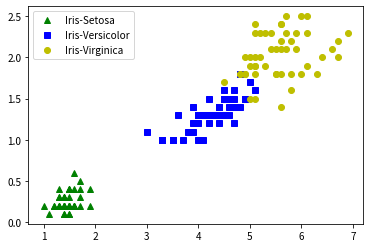

In [3]:
plt.figure(facecolor="white")
plt.plot(df.loc[df["target"]==0, "petal length (cm)"],df.loc[df["target"]==0, "petal width (cm)"], "g^", label="Iris-Setosa")
plt.plot(df.loc[df["target"]==1, "petal length (cm)"],df.loc[df["target"]==1, "petal width (cm)"], "bs", label="Iris-Versicolor")
plt.plot(df.loc[df["target"]==2, "petal length (cm)"],df.loc[df["target"]==2, "petal width (cm)"], "yo", label="Iris-Virginica")
plt.legend()
plt.show()

### ハードマージン分類

In [4]:
# 決定境界とマージンをプロット
# args :
# model : 描画するモデル
# xmin ; 描画するxの最小値
# xmax : 描画するxの最大値
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

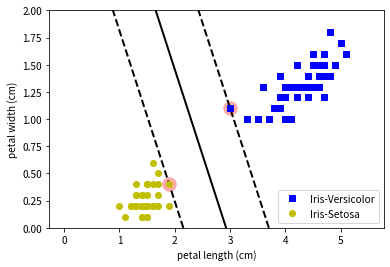

In [7]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# SetosaとVirsicolorのみ抽出
datasets = df[df["target"]!=2]
X = df[["petal length (cm)","petal width (cm)"]].to_numpy().reshape(-1,2)
y = df["target"].to_numpy()
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X) # 標準化
# C : マージン違反の調整,Cを小さくするとマージン違反が増え,Cを大きくするとマージン違反が減る
model = SVC(kernel="linear",C=float("inf"))
model.fit(X,y)
plt.figure(facecolor="white")
plot_svc_decision_boundary(model,0,5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.ylim(0,2)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend()
plt.show()

### ソフトマージン分類

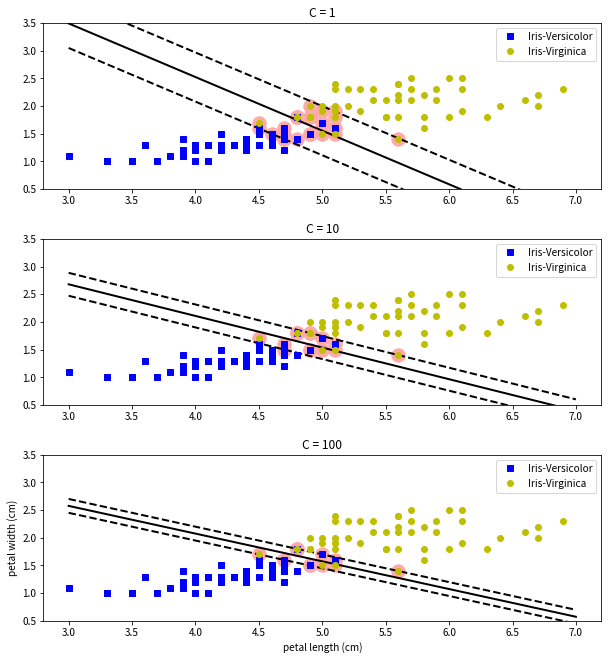

In [8]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

Clist = [1,10,100]
# SetosaとVirsicolorのみ抽出
datasets = df[df["target"]!=0]
X = df[["petal length (cm)","petal width (cm)"]].to_numpy().reshape(-1,2)
y = df["target"].to_numpy()
setosa_or_versicolor = (y == 1) | (y == 2)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X) # 標準化
# C : マージン違反の調整,Cを小さくするとマージン違反が増え,Cを大きくするとマージン違反が減る
fig = plt.figure(facecolor="white",figsize=(10,11))
for i in range(len(Clist)):
    plt.subplot(len(Clist),1,i+1)
    model = SVC(kernel="linear",C=Clist[i])
    model.fit(X,y)
    plot_svc_decision_boundary(model,3,7)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "yo", label="Iris-Virginica")
    plt.ylim(0.5,3.5)
    plt.title("C = "+str(Clist[i]))
    plt.legend()
fig.subplots_adjust(hspace=0.3, wspace=0.2)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()

## 非線形SVM分類器
make_moonsデータセットは三日月状のデータを生成するデータセットである.引数としてサンプル数n_samples,散らばりnoiseを与えることができる.このノートでは,make_moonsデータセットを用いて非線形SVM分類器を扱う.

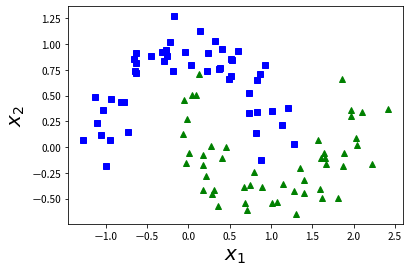

In [31]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

plt.figure(facecolor="white")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$x_2$",fontsize=20)
plt.show()

機械学習プロジェクトにおいて,分類や回帰を行う推定器を利用する際に変換器も同時に用いられることが多い.Pipelineはデータ変換から学習,推定の処理をまとめる機能である.

In [39]:
# 決定境界を描画する
def plot_predictions(clf, axes):
    # axes : list of [xmin,xmax,ymin,ymax]
    #  メッシュを生成
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    # メッシュの予測
    y_pred = clf.predict(X).reshape(x0.shape)
    # SVC.decision_function() : 分離超平面からの符号付き距離を返す 
    y_decision = clf.decision_function(X).reshape(x0.shape)
    # 分類結果ごとに塗り分け
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

C:\Users\yudai\anaconda3\envs\py38-gpu\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


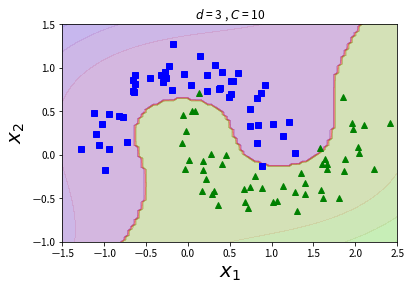

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

d = 3
C = 10

model = Pipeline([
    # 処理名とオブジェクトのタプルを記述する
    ("poly_features",PolynomialFeatures(degree=d)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=C,loss="hinge"))
])
model.fit(X,y)

plt.figure(facecolor="white")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plot_predictions(model, [-1.5, 2.5, -1, 1.5])
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$x_2$",fontsize=20)
plt.title("$d$ = "+str(d)+" , $C$ = "+str(C))
plt.show()

### 多項式カーネル

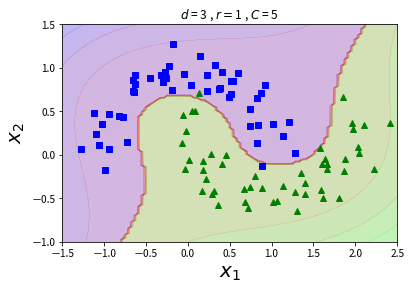

In [48]:
from sklearn.svm import SVC

d=3 # 次元
r=1 # 高・低次元からの影響の調整
C=5 # マージン違反調整

model = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=d,coef0=r,C=C))
])
model.fit(X,y)

plt.figure(facecolor="white")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plot_predictions(model, [-1.5, 2.5, -1, 1.5])
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$x_2$",fontsize=20)
plt.title("$d$ = "+str(d)+" , $r = $"+str(r)+" , $C$ = "+str(C))
plt.show()

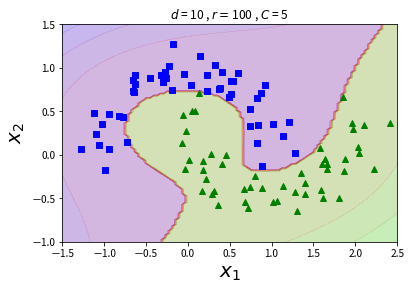

In [49]:
d=10 # 多項式カーネルの次元
r=100 # 高・低次元からの影響の調整
C=5 # マージン違反調整

model = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=d,coef0=r,C=C))
])
model.fit(X,y)

plt.figure(facecolor="white")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plot_predictions(model, [-1.5, 2.5, -1, 1.5])
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$x_2$",fontsize=20)
plt.title("$d$ = "+str(d)+" , $r = $"+str(r)+" , $C$ = "+str(C))
plt.show()

グラフから10次多項式カーネルを用いた時,過学習を起こしていることがわかる.

### ガウスRBFカーネル

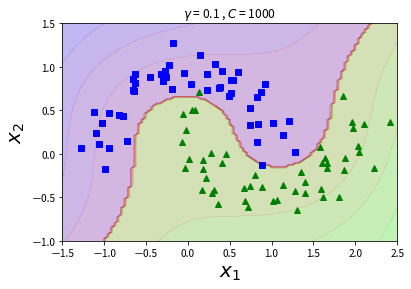

In [51]:
gamma=0.1
C=1000 # マージン違反調整

model = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",gamma=gamma,C=C))
])
model.fit(X,y)

plt.figure(facecolor="white")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plot_predictions(model, [-1.5, 2.5, -1, 1.5])
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$x_2$",fontsize=20)
plt.title("$\gamma$ = "+str(gamma)+" , $C$ = "+str(C))
plt.show()

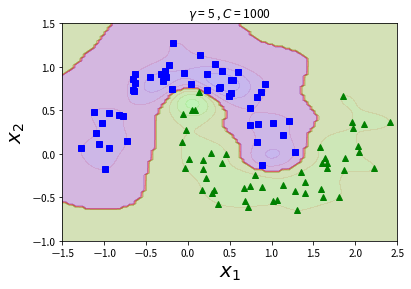

In [52]:
gamma=5
C=1000 # マージン違反調整

model = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",gamma=gamma,C=C))
])
model.fit(X,y)

plt.figure(facecolor="white")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plot_predictions(model, [-1.5, 2.5, -1, 1.5])
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$x_2$",fontsize=20)
plt.title("$\gamma$ = "+str(gamma)+" , $C$ = "+str(C))
plt.show()

gammaパラメータを大きくするとベル型の曲線が狭くなる.このため各インスタンスの影響が小さくなり,決定境界が不規則になる.逆にgammaパラメータを小さくすると各インスタンスの影響を受ける範囲が広がり,決定境界は滑らかになる.